In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\arunr\\Downloads\\heart_disease.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [4]:
df.shape

(303, 14)

In [5]:
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
df.duplicated().sum()

0

In [7]:
#removing all the whitespaces from the coloumn names
df.columns=df.columns.str.strip()
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [9]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
scaler = MinMaxScaler()
df['trestbps'] = scaler.fit_transform(df['trestbps'].values.reshape(-1, 1))

In [10]:
df['chol'] = scaler.fit_transform(df['chol'].values.reshape(-1, 1))

In [11]:
df['thalach'] = scaler.fit_transform(df['thalach'].values.reshape(-1, 1))

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,0.481132,0.244292,1,2,0.603053,0,2.3,2,0,2,0
1,67,1,3,0.622642,0.365297,0,2,0.282443,1,1.5,1,3,1,1
2,67,1,3,0.245283,0.235160,0,2,0.442748,1,2.6,1,2,3,1
3,37,1,2,0.339623,0.283105,0,0,0.885496,0,3.5,2,0,1,0
4,41,0,1,0.339623,0.178082,0,2,0.770992,0,1.4,0,0,1,0


In [13]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.122300,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.367911,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.259835,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.126879,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.030438,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.054164,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.019115,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.257980,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.321680,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.333925,0.424510


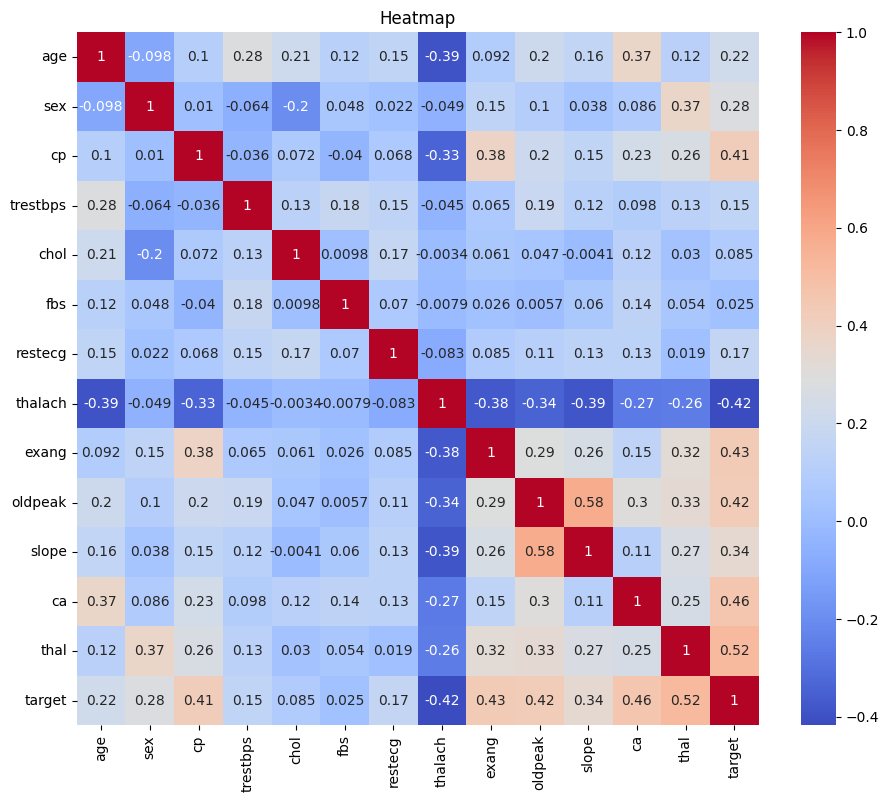

In [14]:
#heatmap
plt.figure(figsize=(11,9))
corr_matrix=df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

In [15]:
print(corr_matrix['target'].abs())

age         0.223120
sex         0.276816
cp          0.414446
trestbps    0.150825
chol        0.085164
fbs         0.025264
restecg     0.169202
thalach     0.417167
exang       0.431894
oldpeak     0.424510
slope       0.339213
ca          0.460033
thal        0.515894
target      1.000000
Name: target, dtype: float64


In [16]:
df.drop(columns=['chol','fbs'], inplace=True)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
count = df['target'].value_counts()

Text(0, 0.5, 'Count')

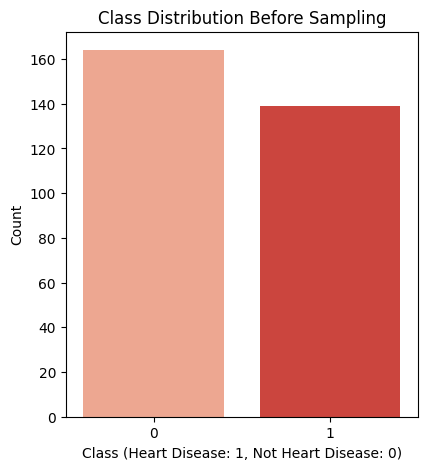

In [19]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=count.index, y=count.values, palette='Reds')
plt.title('Class Distribution Before Sampling')
plt.xlabel('Class (Heart Disease: 1, Not Heart Disease: 0)')
plt.ylabel('Count')

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x=df.drop(columns=['target'])
y=df['target']

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2, random_state=42)

In [32]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(242, 11)
(242,)
(61, 11)
(61,)


In [33]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model
lg = LogisticRegression()

# Fit the model to the training data
lg.fit(xtrain, ytrain)

c:\Users\arunr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
import joblib
joblib.dump(lg,'lgm_model.joblib')

['lgm_model.joblib']

In [35]:

lgm_model = joblib.load('lgm_model.joblib')

In [36]:
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split

In [37]:
y_pred = lgm_model.predict(xtest)

lgm_accuracy = accuracy_score(ytest, y_pred)
lgm_conf_matrix = confusion_matrix(ytest, y_pred)
lgm_class_report = classification_report(ytest, y_pred)

Accuracy: 0.90

Confusion Matrix:
[[26  3]
 [ 3 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



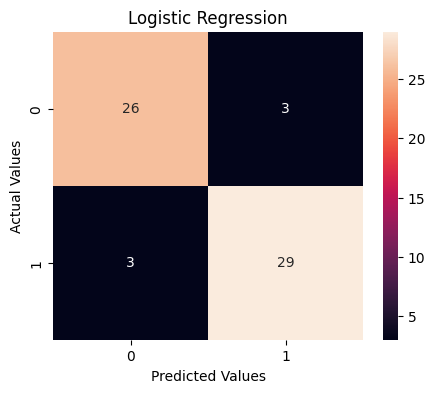

In [38]:
#Print the metrics
print(f'Accuracy: {lgm_accuracy:.2f}')
print(f'\nConfusion Matrix:\n{lgm_conf_matrix}')
print(f'\nClassification Report:\n{lgm_class_report}')


#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(lgm_conf_matrix, annot=True,fmt="d")
plt.title('Logistic Regression')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [39]:
lgm_pred = lg.predict_proba(xtest)[:, 1]
lgm_fpr, lg_tpr, _ = roc_curve(ytest,lgm_pred)
log_reggr_auc = roc_auc_score(ytest, lgm_pred)


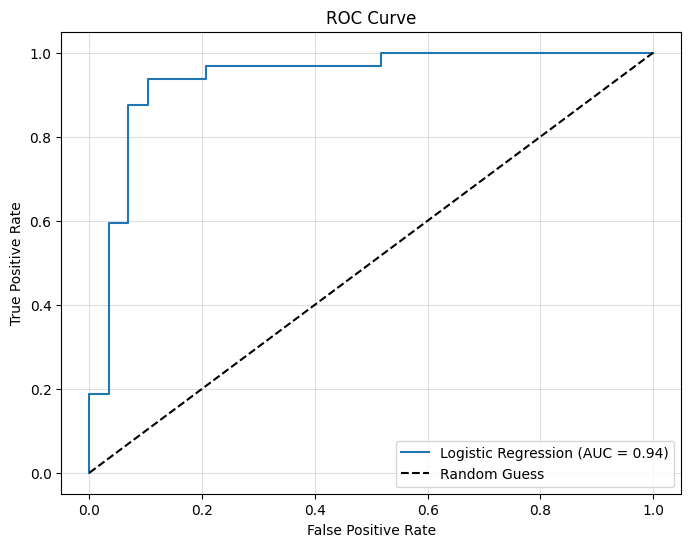

In [40]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(lgm_fpr, lg_tpr, label=f'Logistic Regression (AUC = {log_reggr_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.4)
plt.show()